## Question 4
### PART-A
Importing the Necessary Libraries

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(322034345)
random.seed(322034345)

In this part we are basically asked to implement node deleton strategy in a network. Here is how we implemented it.
First we created a function named deleteRandomNode:
    This function randomly removes nodes from a network and measures the characteristic path length and the size of the giant component for different fractions of node removal.

Parameters:
    adj_matrix: numpy.ndarray - The adjacency matrix representing the input network.

Flow of code:
    First we created a graph G from the input adjacency matrix.
    Then defined a range of fractions (0 to 0.5) for node removal.

    Now For each fraction of node removal (from 0% to 50%):
        Randomly select and remove nodes.
        Identify the largest connected component (Giant Cluster).
        Calculate the characteristic path length.

Then it outputs lists of characteristic path lengths and giant cluster sizes for each fraction.
In the code it returns the path_lengths and giant_cluster_sizes

Two graphs were plotted:
    1. Characteristic Path Length vs fraction of nodes deleted
    2. Giant Cluster Size vs fraction of nodes deleted

Observation:
    1. At first the path length remains stable after that there is no significant increase or sharp rise
    suggesting that network maintains its connectedness despite random deletions.
    2. the size of giant cluster decreases linearly as the fraction of node removal increases. Even after 
    removing 50% of hte nodes the network remians partially connected.


Conclusion:
    The network remains robust under random node deletions, with minimal impact on characteristic path length.
    The giant cluster size decreases gradually, indicating no sudden network collapse.

In [2]:

def deleteRandomNode(adj_matrix,flag):
    if(flag==0):
        fractions = np.linspace(0, 0.05, 10)
    else:
        fractions = np.linspace(0, 0.5, 60)
    G = nx.from_numpy_array(adj_matrix)
    nodes = list(G.nodes())

    path_lengths = []
    giant_cluster_sizes = []
    initial_largest_cc_size = len(max(nx.connected_components(G), key=len))

    for f in fractions:
        G_copy = G.copy()
        num_remove = int(f * len(nodes))
        remove_nodes = random.sample(nodes, num_remove)
        G_copy.remove_nodes_from(remove_nodes)

        b = nx.connected_components(G_copy)
        components = list(b)
        if components:
            largest_cc = max(components, key=len)
            H = G_copy.subgraph(largest_cc)
            if(flag==0):
                if nx.is_connected(H):
                    a = nx.average_shortest_path_length(H)
                    path_lengths.append(a)
                else:
                    path_lengths.append(np.nan)
            else:
                giant_cluster_sizes.append(len(largest_cc)/initial_largest_cc_size)
        else:
            giant_cluster_sizes.append(0)
            path_lengths.append(np.nan)
    if(flag==0):
        return path_lengths, fractions
    else:
        return giant_cluster_sizes, fractions


def deleteTargetNode(G,flag):
    if(flag==0):
        fractions = np.linspace(0, 0.05, 10)
    else:
        fractions = np.linspace(0, 0.5, 60)
    nodes = sorted(G.nodes(), key=lambda x: G.degree[x], reverse=True)  # Sort by degree

    path_lengths = []
    giant_cluster_sizes = []
    initial_largest_cc_size = len(max(nx.connected_components(G), key=len))

    for f in fractions:
        G_copy = G.copy()
        num_remove = int(f * len(nodes))
        remove_nodes = nodes[:num_remove]  # Remove highest-degree nodes first
        G_copy.remove_nodes_from(remove_nodes)

        components = list(nx.connected_components(G_copy))
        if components:
            largest_cc = max(components, key=len)
            H = G_copy.subgraph(largest_cc)
            if(flag==0):
                if nx.is_connected(H):
                    path_lengths.append(nx.average_shortest_path_length(H))
                else:
                    path_lengths.append(np.nan)
            else:
                giant_cluster_sizes.append(len(largest_cc)/initial_largest_cc_size)
        else:
            giant_cluster_sizes.append(0)
            path_lengths.append(np.nan)
    if(flag==0):
        return path_lengths, fractions
    else:
        return giant_cluster_sizes, fractions




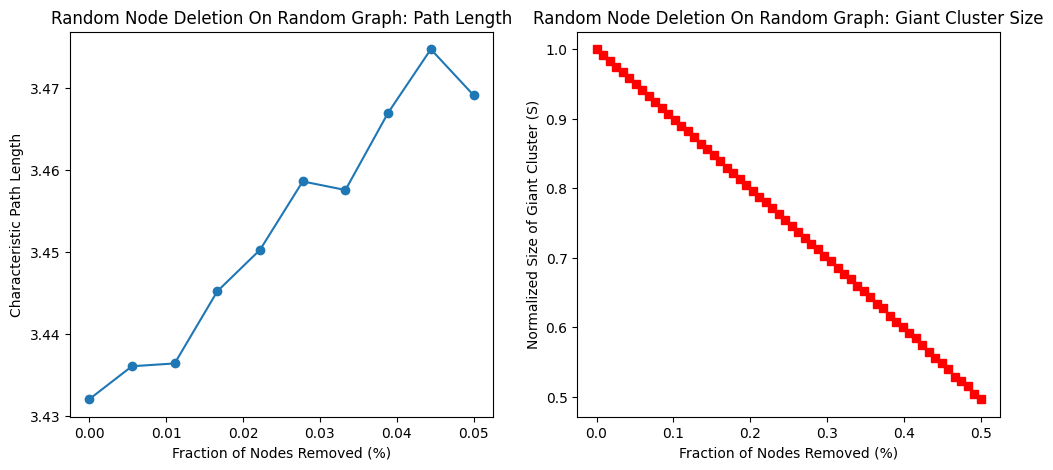

In [43]:
NUM_NODES = 1500
AVG_DEGREE = 10
P = AVG_DEGREE / NUM_NODES

# Generate Erdős–Rényi random graph
random_graph = nx.erdos_renyi_graph(NUM_NODES, P)

adj_matrix = nx.to_numpy_array(random_graph)

# chlo random k liye
path_lengths,  path_fractions = deleteRandomNode(adj_matrix,0)
cluster_sizes , cluster_fractions = deleteRandomNode(adj_matrix,1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(path_fractions, path_lengths, marker='o', linestyle='-')
plt.xlabel("Fraction of Nodes Removed (%)")
plt.ylabel("Characteristic Path Length")
plt.title("Random Node Deletion On Random Graph: Path Length")

# Giant Cluster Size Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_fractions, cluster_sizes, marker='s', color='r', linestyle='-')
plt.xlabel("Fraction of Nodes Removed (%)")
plt.ylabel("Normalized Size of Giant Cluster (S)")
plt.title("Random Node Deletion On Random Graph: Giant Cluster Size")

plt.show()

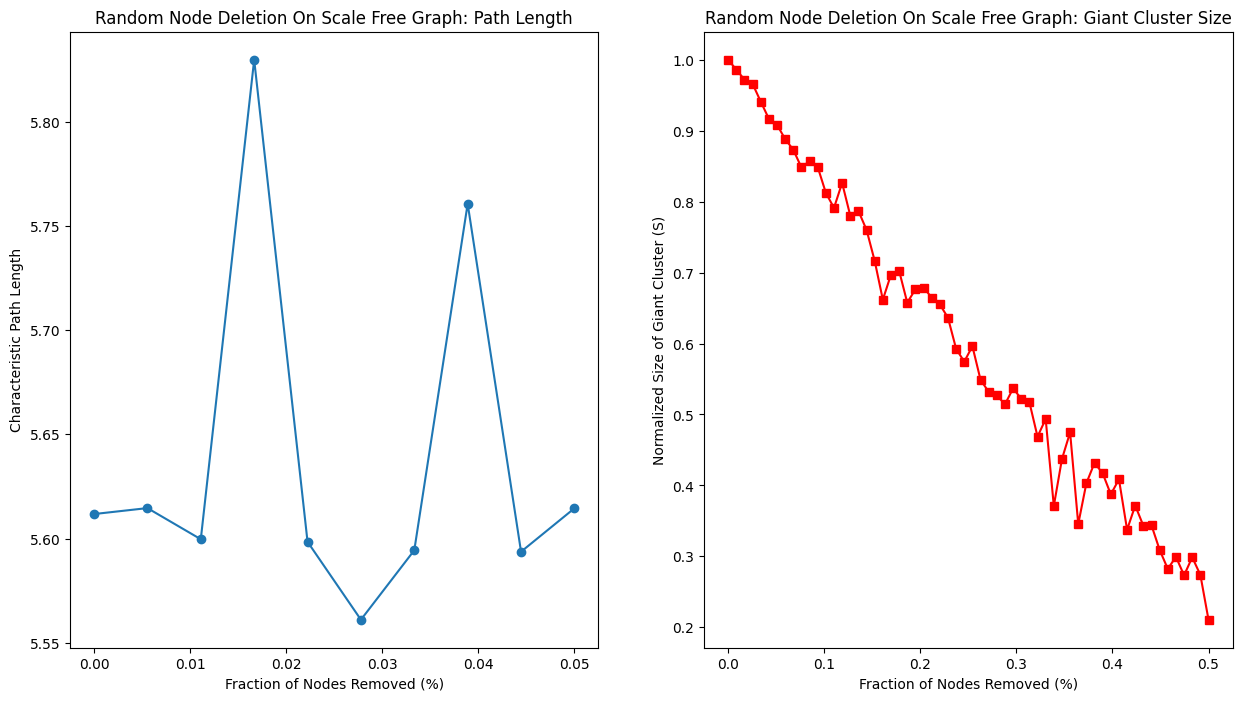

In [44]:
NUM_NODES = 1000
M = 2

real_network = nx.read_edgelist("numerical_yeast_data.csv", nodetype=int,delimiter=",")
adj_matrix = nx.to_numpy_array(real_network)

# chlo scale free k liye
path_lengths,  path_fractions = deleteRandomNode(adj_matrix,0)
cluster_sizes , cluster_fractions = deleteRandomNode(adj_matrix,1)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.plot(path_fractions, path_lengths, marker='o', linestyle='-')
plt.xlabel("Fraction of Nodes Removed (%)")
plt.ylabel("Characteristic Path Length")
plt.title("Random Node Deletion On Scale Free Graph: Path Length")

# Giant Cluster Size Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_fractions, cluster_sizes, marker='s', color='r', linestyle='-')
plt.xlabel("Fraction of Nodes Removed (%)")
plt.ylabel("Normalized Size of Giant Cluster (S)")
plt.title("Random Node Deletion On Scale Free Graph: Giant Cluster Size")

plt.show()

### PART-B

This part is basically the extended version of the first part, we'll use both the deleteRandomNode function 
and deleteTargetNode(we'll make this in this part) function.

Objective of this part is To compare the impact of node deletions on random and scale-free networks under two strategies
    Random Deletion: Nodes are removed uniformly at random.
    Targeted Deletion: High-degree nodes are removed first.

First generate two kinds of networks:
    Random Graph: Erdős-Rényi model (nx.erdos_renyi_graph)
    Scale-Free Graph: Barabási-Albert model (nx.barabasi_albert_graph)

Then we apply both the deletetion stratergy to both the graphs
    Random Deletion: Use deleteRandomNode() function.
    Targeted Deletion: Implement deleteTargetNode() function.

deleteTargetNode Function:
Inputs:
    G: A NetworkX graph.
    fractions: List of fractions of nodes to remove (e.g., [0.1, 0.2, 0.5]).
Outputs:
    path_lengths: Average shortest path length of the largest connected component after each fraction of node removal.
    giant_cluster_sizes: Size of the largest connected component after each fraction.
Process:
    Sort nodes by degree (highest first).
    For each fraction:
        Remove corresponding nodes.
        Find the largest connected component.
        Record its size and average shortest path length (or NaN if disconnected).

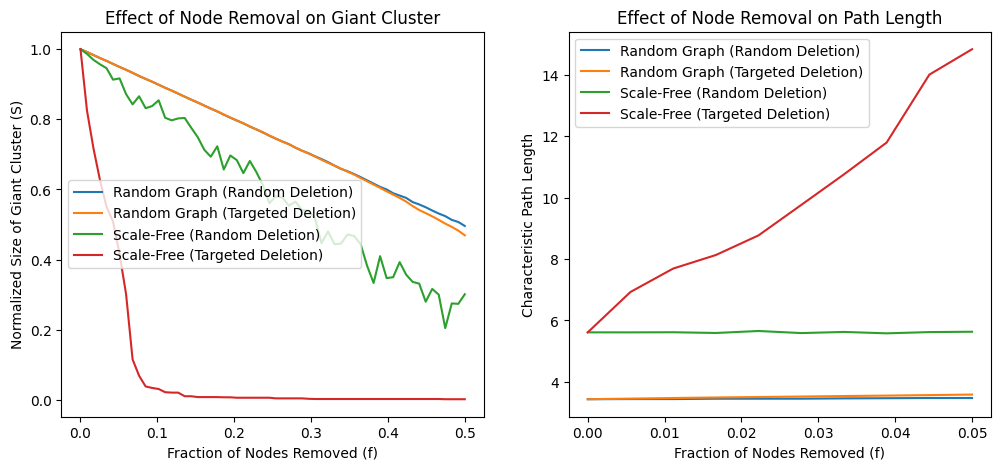

In [46]:
adj_matrix_random = nx.to_numpy_array(random_graph)
adj_matrix_real = nx.to_numpy_array(real_network)

# chlo random k liye
path_lengths_random_random,  path_fractions = deleteRandomNode(adj_matrix_random,0)
cluster_sizes_random_random , cluster_fractions = deleteRandomNode(adj_matrix_random,1)
path_lengths_random_target,  path_fractions = deleteTargetNode(random_graph,0)
cluster_sizes_random_target , cluster_fractions = deleteTargetNode(random_graph,1)


#chlo real k liye
path_lengths_real_random,  path_fractions = deleteRandomNode(adj_matrix_real,0)
cluster_sizes_real_random , cluster_fractions = deleteRandomNode(adj_matrix_real,1)
path_lengths_real_target,  path_fractions = deleteTargetNode(real_network,0)
cluster_sizes_real_target , cluster_fractions = deleteTargetNode(real_network,1)



plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_fractions, cluster_sizes_random_random, label="Random Graph (Random Deletion)")
plt.plot(cluster_fractions, cluster_sizes_random_target, label="Random Graph (Targeted Deletion)")
plt.plot(cluster_fractions, cluster_sizes_real_random, label="Scale-Free (Random Deletion)")
plt.plot(cluster_fractions, cluster_sizes_real_target, label="Scale-Free (Targeted Deletion)")
plt.xlabel("Fraction of Nodes Removed (f)")
plt.ylabel("Normalized Size of Giant Cluster (S)")
plt.title("Effect of Node Removal on Giant Cluster")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(path_fractions, path_lengths_random_random, label="Random Graph (Random Deletion)")
plt.plot(path_fractions, path_lengths_random_target, label="Random Graph (Targeted Deletion)")
plt.plot(path_fractions, path_lengths_real_random, label="Scale-Free (Random Deletion)")
plt.plot(path_fractions, path_lengths_real_target, label="Scale-Free (Targeted Deletion)")
plt.xlabel("Fraction of Nodes Removed (f)")
plt.ylabel("Characteristic Path Length")
plt.title("Effect of Node Removal on Path Length")
plt.legend()

plt.show()



Analysis and Plots(Of all 4 pairs):

Plot characteristic path length vs. fraction of nodes removed.
Plot giant cluster size vs. fraction of nodes removed.

Observations:
    - Random graphs and scale-free networks show a gradual decrease under random deletion.
    Targeted deletion in scale-free networks causes a rapid breakdown, reducing the giant cluster size sharply.

    - Random deletion causes  path length to remain constant for both network types.
    Targeted deletion in scale-free networks causes an exponential rise, indicating severe disruption in connectivity.

Conclusions:
    - Scale-free networks are highly vulnerable to targeted attacks, while random graphs degrade gradually under both deletion strategies.
    -  Hubs in scale-free networks are critical—removing them rapidly fragments the network and increases path length.
    - This supports the Albert et al. (2000) findings—random failures have less impact, while targeted deletions quickly disintegrate scale-free networks.

### PART-C
In this, we are performing above analysis on Facebook scale-free network.

Methodology:
    Dataset: Load a real-world network (e.g., facebook_combined.txt).
    Apply Deletion Strategies:
        Random Node Deletion.
        Targeted Node Deletion.

Implementation:
    Load the network using nx.read_edgelist().
    Perform random and targeted deletions.
    Plot the results for giant cluster size and characteristic path length.

### PART-D

Alignment with Albert et al., Nature (2000)

Characteristic Path Length:
    Random graphs: Increases gradually in both strategies.
    Scale-free networks: Remain stable under random deletion but grow rapidly under targeted deletion.

Size of Giant Cluster (S):
    Random graphs: Gradual reduction for both strategies.
    Scale-free networks: Stable under random deletion but collapse under targeted deletion, confirming findings by Albert et al.

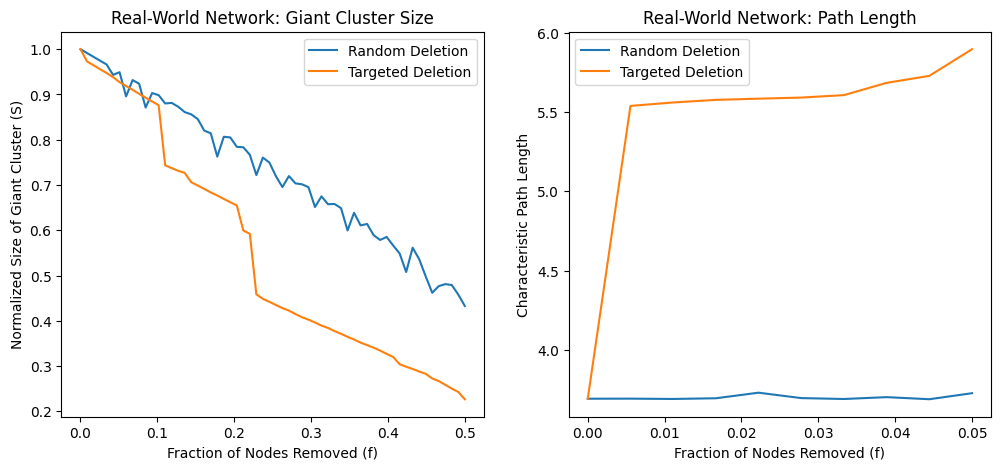

In [3]:

# Load real-world dataset (Example: Power Grid Network)
real_world_nw = nx.read_edgelist("facebook_combined.txt", nodetype=int)  # Adjust file path
adj_matrix_real = nx.to_numpy_array(real_world_nw)

path_lengths_real_random,  path_fractions = deleteRandomNode(adj_matrix_real,0)
cluster_sizes_real_random , cluster_fractions = deleteRandomNode(adj_matrix_real,1)
path_lengths_real_target,  path_fractions = deleteTargetNode(real_world_nw,0)
cluster_sizes_real_target , cluster_fractions = deleteTargetNode(real_world_nw,1)



plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_fractions, cluster_sizes_real_random, label="Random Deletion")
plt.plot(cluster_fractions, cluster_sizes_real_target, label="Targeted Deletion")
plt.xlabel("Fraction of Nodes Removed (f)")
plt.ylabel("Normalized Size of Giant Cluster (S)")
plt.title("Real-World Network: Giant Cluster Size")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(path_fractions, path_lengths_real_random, label="Random Deletion")
plt.plot(path_fractions, path_lengths_real_target, label="Targeted Deletion")
plt.xlabel("Fraction of Nodes Removed (f)")
plt.ylabel("Characteristic Path Length")
plt.title("Real-World Network: Path Length")
plt.legend()

plt.show()
